In [104]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [105]:
df=pd.read_csv('crimeinindia_againstwomen.csv')

In [106]:
df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [107]:
df.shape

(9017, 10)

In [108]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [109]:
df.rename(columns={'Dowry Deaths':'dowry_deaths','Kidnapping and Abduction':'kidnapping','Assault on women with intent to outrage her modesty':'Assault','Cruelty by Husband or his Relatives':'domestic_violence','Insult to modesty of Women':'insult_to_modesty','Importation of Girls':'importation_of_girls'},inplace=True)


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   STATE/UT              9017 non-null   object
 1   DISTRICT              9017 non-null   object
 2   Year                  9017 non-null   int64 
 3   Rape                  9017 non-null   int64 
 4   kidnapping            9017 non-null   int64 
 5   dowry_deaths          9017 non-null   int64 
 6   Assault               9017 non-null   int64 
 7   insult_to_modesty     9017 non-null   int64 
 8   domestic_violence     9017 non-null   int64 
 9   importation_of_girls  9017 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 704.6+ KB


In [111]:
df.dtypes

STATE/UT                object
DISTRICT                object
Year                     int64
Rape                     int64
kidnapping               int64
dowry_deaths             int64
Assault                  int64
insult_to_modesty        int64
domestic_violence        int64
importation_of_girls     int64
dtype: object

In [112]:
df.isnull().sum()

STATE/UT                0
DISTRICT                0
Year                    0
Rape                    0
kidnapping              0
dowry_deaths            0
Assault                 0
insult_to_modesty       0
domestic_violence       0
importation_of_girls    0
dtype: int64

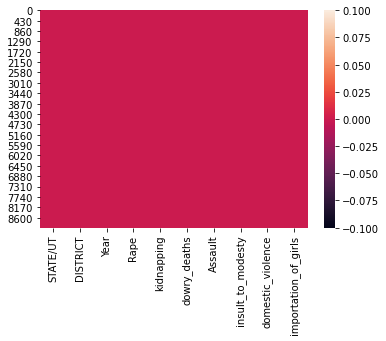

In [113]:
sns.heatmap(df.isnull())

In [114]:
df['Year'].drop_duplicates()

0       2001
716     2002
1435    2003
2163    2004
2892    2005
3625    2006
4365    2007
5108    2008
5869    2009
6636    2010
7415    2011
8206    2012
Name: Year, dtype: int64

In [115]:
districts = len(df.DISTRICT.unique())
districts

808

In [116]:
df.drop(['DISTRICT'], axis = 1, inplace=True)

In [117]:
print(df['STATE/UT'].unique())

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY']


In [118]:
len(df['STATE/UT'].unique())

35

# EDA

In [119]:
victims_raped = df.Rape.sum()
victims_kidnapped = df.kidnapping.sum()
dowery_death = df.dowry_deaths.sum()
modesty_assault =df.Assault.sum()
insult_to_modesty =df.insult_to_modesty.sum()
domestic_violence =df.domestic_violence.sum()
girls_imported =df.importation_of_girls.sum()

In [120]:
total_population_of_victim_overall = victims_raped + victims_raped + dowery_death +modesty_assault+ insult_to_modesty + domestic_violence+ girls_imported
total_population_of_victim_overall

4045556

This above analysis shows that more than 4 million  females, over the years 2001-2012, have been a victim of assault, violance, rape or even death, in India alone.

Text(0, 0.5, 'Importation of girls in India')

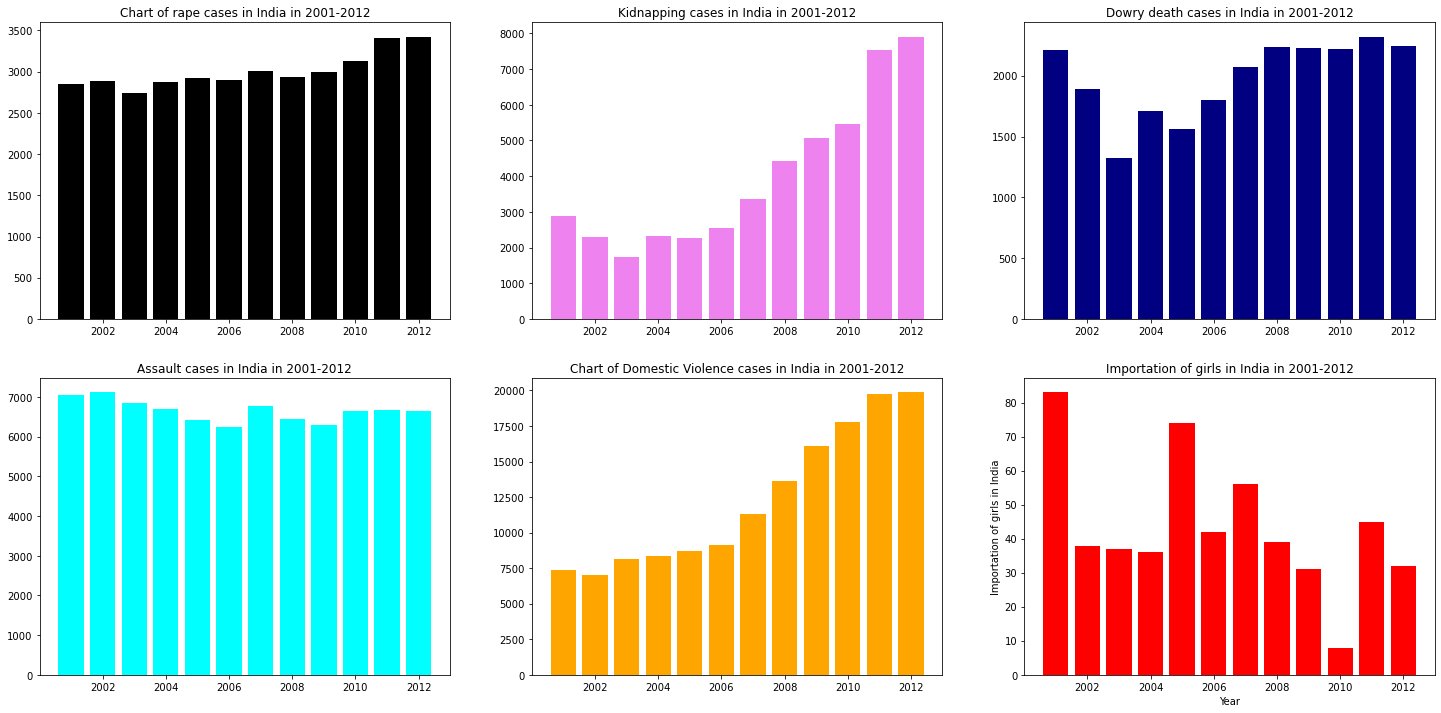

In [121]:
fig, axes = plt.subplots(2, 3, figsize=(25, 12))

axes[0,0].set_title("Chart of rape cases in India in 2001-2012")
axes[0,0].bar(df.Year, df.Rape, color = 'black');
plt.xlabel('Year')
plt.ylabel('Cases of Rape in India')

axes[0,1].set_title("Kidnapping cases in India in 2001-2012")
axes[0,1].bar(df.Year, df.kidnapping, color = 'violet');
plt.xlabel('Year') 
plt.ylabel('Kidnapping ')

axes[0,2].set_title("Dowry death cases in India in 2001-2012")
axes[0,2].bar(df.Year,df.dowry_deaths, color = 'navy');
plt.xlabel('Year') 
plt.ylabel('Cases of Dowry deaths in India') 

axes[1,0].set_title("Assault cases in India in 2001-2012")
axes[1,0].bar(df.Year, df.Assault, color = 'cyan');
plt.xlabel('Year') 
plt.ylabel('Cases of Assaulting a women for her modesty in India')

axes[1,1].set_title("Chart of Domestic Violence cases in India in 2001-2012")
axes[1,1].bar(df.Year, df.domestic_violence, color = 'orange');
plt.xlabel('Year')
plt.ylabel('Cases of Domestic Violence in India') 

axes[1,2].set_title("Importation of girls in India in 2001-2012")
axes[1,2].bar(df.Year,df.importation_of_girls, color = 'red');
plt.xlabel('Year')
plt.ylabel('Importation of girls in India') 


From above graph we conclude that,kidnapping and domestic violence cases have continuosly increased over the years,while assault,rape,dowry_deaths case are very high in almost all the year


In [123]:
count_df =df.groupby('Year')[['STATE/UT']].count()
count_df

,STATE/UT
Year,
2001,716
2002,719
2003,728
2004,729
2005,733
2006,740
2007,743
2008,761
2009,767


2012 has been the year, where violance against women was reported the maximum.

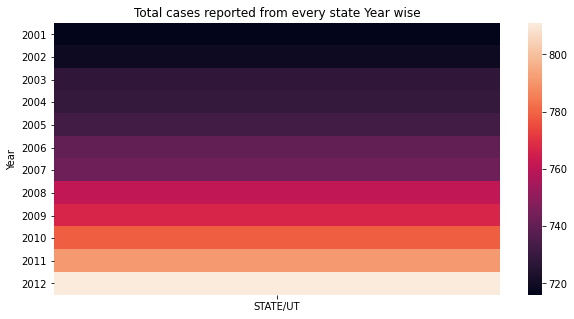

In [124]:
plt.figure(figsize=(10,5))
plt.title("Total cases reported from every state Year wise")
sns.heatmap(count_df)


In [126]:
max_rape_cases = df.sort_values('Rape', ascending = False).head(10)
max_rape_cases.head(10)

,STATE/UT,Year,Rape,kidnapping,dowry_deaths,Assault,insult_to_modesty,domestic_violence,importation_of_girls
8611,MADHYA PRADESH,2012,3425,1127,743,6655,774,3988,6
7810,MADHYA PRADESH,2011,3406,1088,811,6665,762,3732,45
7025,MADHYA PRADESH,2010,3135,1030,892,6646,918,3756,5
4735,MADHYA PRADESH,2007,3010,701,742,6772,780,3294,0
6250,MADHYA PRADESH,2009,2998,841,858,6307,728,3983,1
5485,MADHYA PRADESH,2008,2937,736,805,6445,758,3185,0
3259,MADHYA PRADESH,2005,2921,604,739,6426,792,2989,3
3993,MADHYA PRADESH,2006,2900,617,764,6243,762,2989,0
1068,MADHYA PRADESH,2002,2891,639,674,7118,783,3117,0
2525,MADHYA PRADESH,2004,2875,584,751,6690,804,3436,0


In [127]:
#Madhya Pradesh reported the maximum rape cases in all year

In [130]:
max_dowry_death_cases =df.sort_values('dowry_deaths', ascending = False)
max_dowry_death_cases.head(10)

,STATE/UT,Year,Rape,kidnapping,dowry_deaths,Assault,insult_to_modesty,domestic_violence,importation_of_girls
8132,UTTAR PRADESH,2011,2042,7525,2322,3455,3,7121,0
8938,UTTAR PRADESH,2012,1963,7910,2244,3247,8,7661,0
5796,UTTAR PRADESH,2008,1871,4439,2237,2955,3374,8312,0
6563,UTTAR PRADESH,2009,1759,5078,2232,2782,2524,8566,0
7342,UTTAR PRADESH,2010,1563,5468,2217,2793,11,7978,0
650,UTTAR PRADESH,2001,1958,2879,2211,2870,2575,7365,0
5040,UTTAR PRADESH,2007,1648,3363,2076,2522,2882,7650,0
1366,UTTAR PRADESH,2002,1415,2298,1893,2145,1887,5679,0
4297,UTTAR PRADESH,2006,1314,2551,1798,2096,2714,5204,0
2824,UTTAR PRADESH,2004,1397,2324,1708,1900,2682,4950,3


In [131]:
#Uttar Pradesh reported the maximum dowry death cases in all year

In [132]:
max_domestic_violance_cases =df.sort_values('domestic_violence', ascending = False)
max_domestic_violance_cases.head(10)

,STATE/UT,Year,Rape,kidnapping,dowry_deaths,Assault,insult_to_modesty,domestic_violence,importation_of_girls
8982,WEST BENGAL,2012,2046,4168,593,3345,556,19865,12
8172,WEST BENGAL,2011,2363,3711,510,2363,200,19772,0
7381,WEST BENGAL,2010,2311,2764,507,2465,163,17796,8
6602,WEST BENGAL,2009,2336,2187,506,1942,108,16112,5
5835,WEST BENGAL,2008,2263,1907,451,2396,94,13663,5
8239,ANDHRA PRADESH,2012,1341,1403,504,4816,3714,13389,0
7448,ANDHRA PRADESH,2011,1442,1612,599,4849,3658,13376,0
8806,RAJASTHAN,2012,2049,2697,478,2352,18,13312,0
8004,RAJASTHAN,2011,1800,2713,514,2447,9,12218,0
6669,ANDHRA PRADESH,2010,1362,1531,588,4634,4562,12080,0


In [ ]:
#maximum cases of Domestic Violance cases came from West Bengal in the year 2012,

In [133]:
max_importation_case =df.sort_values('importation_of_girls', ascending = False)
max_importation_case.head(10)

,STATE/UT,Year,Rape,kidnapping,dowry_deaths,Assault,insult_to_modesty,domestic_violence,importation_of_girls
115,BIHAR,2001,888,518,859,562,21,1558,83
3013,BIHAR,2005,1147,929,1014,451,13,1574,74
3597,WEST BENGAL,2005,1686,1039,446,1572,54,6936,61
3590,WEST BENGAL,2005,148,97,48,95,3,545,60
4486,BIHAR,2007,1555,1260,1172,853,12,1635,56
3005,BIHAR,2005,28,4,40,10,0,73,48
7810,MADHYA PRADESH,2011,3406,1088,811,6665,762,3732,45
3746,BIHAR,2006,1232,1084,1188,530,53,1689,42
5378,JHARKHAND,2008,791,499,266,271,23,851,39
102,BIHAR,2001,27,11,90,47,0,152,39


In [134]:
#Bihar shows the maximim no. of importation of girls in the year 2001

In [137]:
#total number of cases, in span of 2001-2012 under each category, state wise.

counts_df=df.groupby('STATE/UT')[['Rape', 'kidnapping', 'dowry_deaths','domestic_violence','importation_of_girls','Assault']].sum()
counts_df

,Rape,kidnapping,dowry_deaths,domestic_violence,importation_of_girls,Assault
STATE/UT,,,,,,
A & N ISLANDS,218,154,12,242,0,428
ANDHRA PRADESH,26958,29872,12430,238014,34,103998
ARUNACHAL PRADESH,1000,1116,4,334,0,1568
ASSAM,32356,45840,2552,78776,16,27240
BIHAR,26248,38778,27096,51360,880,15152
CHANDIGARH,562,1068,84,1614,0,628
CHHATTISGARH,23676,5260,2284,19146,10,38330
D & N HAVELI,112,188,2,76,0,100
DAMAN & DIU,40,30,6,70,0,30
